Physics 215 Mini-project 1st Semester A.Y. 2022-2023

# <center> Simulating a one-dimensional closed quantum system with a harmonic trapping potential using Julia</center> 

**Members**:
* Badua, Mark Louise$^1$
* Oidem, John Rommel$^2$
* Tuquero, Richelle Jade$^3$

**Main Contribution**
- $^1$Benchmarking of the two methods.
- $^2$Implementation of custom split-step method, comparison of two methods to analytic solution.
- $^3$Implementation of method using QuantumOptics package, comparison of two methods to analytic solution.

Note: The PDF submission will show a snapshot of the simulations and the animations are included in the submission.

# Loading Packages

In [1]:
using Pkg;
Pkg.activate(".")
Pkg.add("QuantumOptics")
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("FFTW")
Pkg.add("BenchmarkTools");
Pkg.add("StatsBase")

Pkg.update()
Pkg.status()

using QuantumOptics
using Plots
using LaTeXStrings
using FFTW
using BenchmarkTools
using StatsBase

  Activating new project at `~/Desktop/Physics215_MiniProject`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/Desktop/Physics215_MiniProject/Project.toml`
  [6e0679c1] + QuantumOptics v1.0.8
    Updating `~/Desktop/Physics215_MiniProject/Manifest.toml`
  [621f4979] + AbstractFFTs v1.2.1
  [79e6a3ab] + Adapt v3.4.0
  [ec485272] + ArnoldiMethod v0.2.0
⌅ [7d9fca2a] + Arpack v0.5.3
  [4fba245c] + ArrayInterface v6.0.24
  [30b0a656] + ArrayInterfaceCore v0.1.28
  [6ba088a2] + ArrayInterfaceGPUArrays v0.2.2
  [015c0d05] + ArrayInterfaceOffsetArrays v0.1.7
  [b0d46f97] + ArrayInterfaceStaticArrays v0.1.5
  [dd5226c6] + ArrayInterfaceStaticArraysCore v0.1.3
  [62783981] + BitTwiddlingConvenienceFunctions v0.1.5
  [2a0fbf3d] + CPUSummary v0.2.1
  [49dc2e85] + Calculus v0.5.1
  [d360d2e6] + ChainRulesCore v1.15.6
  [9e997f8a] + ChangesOfVariables v0.1.4
  [fb6a15b2] + CloseOpenIntervals v0.1.11
  [38540f10] + CommonSolve v0.2.3
  [bbf

  [e66e0078] + CompilerSupportLibraries_jll v0.5.2+0
  [deac9b47] + LibCURL_jll v7.84.0+0
  [29816b5a] + LibSSH2_jll v1.10.2+0
  [c8ffd9c3] + MbedTLS_jll v2.28.0+0
  [14a3606d] + MozillaCACerts_jll v2022.2.1
  [4536629a] + OpenBLAS_jll v0.3.20+0
  [05823500] + OpenLibm_jll v0.8.1+0
  [bea87d4a] + SuiteSparse_jll v5.10.1+0
  [83775a58] + Zlib_jll v1.2.12+3
  [8e850b90] + libblastrampoline_jll v5.1.1+0
  [8e850ede] + nghttp2_jll v1.48.0+0
  [3f19e933] + p7zip_jll v17.4.0+0
        Info Packages marked with ⌅ have new versions available but cannot be upgraded. To see why use `status --outdated -m`
   Resolving package versions...
    Updating `~/Desktop/Physics215_MiniProject/Project.toml`
  [91a5bcdd] + Plots v1.38.2
    Updating `~/Desktop/Physics215_MiniProject/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.7
  [944b1d66] + CodecZlib v0.7.0
  [35d6a980] + ColorSchemes v3.20.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.10
  [5ae59095] + Colors v0.12.10
  [d38c42

    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/Physics215_MiniProject/Project.toml`
  No Changes to `~/Desktop/Physics215_MiniProject/Manifest.toml`


Status `~/Desktop/Physics215_MiniProject/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [7a1cc6ca] FFTW v1.5.0
  [b964fa9f] LaTeXStrings v1.3.0
  [91a5bcdd] Plots v1.38.2
  [6e0679c1] QuantumOptics v1.0.8
  [2913bbd2] StatsBase v0.33.21


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1662
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/nuwp4/src/backends.jl:37
[ Info: GR


# Objectives

- KR1: Simulate the one-dimensional quantum system with a trap using the QuantumOptics.jl package.
- KR2: Implement a numerical method/algorithm to solve the quantum system based on the split-step method.
- KR3: Show the time evolution of the wave function using the two methods.
- KR4: Comparison of the two methods to that of the analytical solution.
- KR5: Compare the two methods using @benchmark


## Checklist of accomplished objectives

- [x] KR1: Simulate the one-dimensional quantum system with a trap using the QuantumOptics.jl package.
- [x] KR2: Implement a numerical method/algorithm to solve the quantum system based on the split-step method.
- [x] KR3: Show the time evolution of the wave function using the two methods.
- [x] KR4: Comparison of the two methods to that of the analytical solution.
- [x] KR5: Compare the two methods using @benchmark


# KR1: Simulate the one-dimensional quantum system with a trap using the QuantumOptics.jl package.

In this mini-project, we aim to simulate a one-dimensional closed quantum system with a Harmonic trap. The Hamiltonian simulated is
\begin{equation}
\hat{H} = \frac{\hat{p}^2}{2m}+\frac{m\omega^2\hat{x}^2}{2}\label{1}
\end{equation}
where $\hat{x}$ ($\hat{p}$) is the position (momentum) operator, $m$ is the mass, and $\omega$ is the strength of the trap. In our discussion and simulation, we let the constant $\hbar$ to be 1.

We first implement the given Hamiltonian using the ``QuantumOptics`` package in Julia by [Krämer et al. (2018)](https://www.sciencedirect.com/science/article/abs/pii/S0010465518300328) [1]. Do note that for us to simulate a quantum system, we must first define the operators, bases, and set up the Hamiltonian. We can simulate both closed and open quantum systems. However, in this project, we will only be focusing on closed systems. One advantage of the ``QuantumOptics`` package is that it takes into account the Hilbert space where the operators and basis are. Another advantage of the package is that it is entirely written in Julia and is open-source.
The documentation of the library can be found in [QuantumOptics.jl documentation](https://docs.qojulia.org/).


First we determine the basis states for the position and momentum space using a given system parameters. These bases are specified to assign the Hilbert space of the system where the bases are present to avoid combining bases present in different Hilbert space. By using the ``PositionBasis`` and ``MomentumBasis``, we instruct that these bases should be calculated in real and momentum space, respectively. Note that we include both the position and momentum bases since we plan on having the algorithm use a Fourier transform. Afterwards, we define an operator in Julia. Note that an operator in Julia refers to the coefficients $A_{ij}$ of the abstract operator
\begin{equation}
A = \sum_{ij} A_{ij} |{u_i}\rangle\langle v_j|.
\end{equation}

In [2]:
# System Parameters
m::Float64 = 1.0   # Mass
ω::Float64 = 2.0   # Strength of trapping potential

# Range for position
xmin::Float64 = -4.0
xmax::Float64 = 4.0
Npoints::Int64 = 200;

# Basis
b_x = PositionBasis(xmin, xmax, Npoints);
b_p = MomentumBasis(b_x);

# operators
x_op = position(b_x);
p_op = momentum(b_p);

We want to utilize the fast Fourier transformation to simulate the system. We do this by implementing the function ``transform()``. This lets us change between the real and momentum space of our system by converting the position to momentum operator and vice versa. This comes from the idea that the momentum operator is just the Fourier transform of the position operator. Note that if we only focus on the real or momentum space, the calculations will scale $N^2$ for $N$ dimension. 

The function ``dagger(x)`` returns the Hermitian conjugate of ``x`` or by transforming the ket state as bra state.

In [3]:
px = transform(b_p, b_x) # position to momentum
xp = dagger(px)

FFTOperators(dim=200x200)
  basis left:  Position(xmin=-4.0, xmax=4.0, N=200)
  basis right: Momentum(pmin=-78.53981633974483, pmax=78.53981633974483, N=200)

Then, we proceed on defining our Hamiltonian by using Lazy Operators. The Lazy operators lets us conduct an operation with a different order. For example, the ``LazyProduct(A,B,C)`` simplifies $A*(B*C)$ which is useful for terms like $ \mathrm{IFFT}*(D*(\mathrm{FFT}*\psi))$. Notice that the right basis for ($\mathrm{FFT}*\psi$) is now the momentum basis. This will be used to the kinetic energy part of the Hamiltonian. Hence, the Hamiltonian is a LazySum of the LazyProduct kinetic energy and the potential energy.

In [4]:
K = LazyProduct(xp, p_op^2/2m, px)
V = ω^2*x_op^2*m/2
H = LazySum(K, V)

LazySum(dim=200x200)
  basis: Position(xmin=-4.0, xmax=4.0, N=200)
  operators: 2

Next, we define the initial state as a Gaussian function using the function ``gaussianstate(x, p, sigma)`` where the Gaussian state is initially at ``x`` for real space, and ``p`` for the momentum space with width ``sigma``. The ``gaussianstate(x0, p0, sigma)``, where ``sigma`` is $\sigma$, is given by
\begin{equation}
\Psi_0(x) = \frac{1}{\pi^{1/4}\sqrt{\sigma}}e^{ip_0\left(x-\frac{x_0}{2}\right)-\frac{(x-x_0)^2}{2\sigma^2}}.
\end{equation}
Note that to show the time evolution of $\Psi$, we chose to not use the analytic initial state or the ground state. We do this by shifting the initial state away from the center of the harmonic trap.

In [5]:
x0::Float64 = 2.0 
p0::Float64 = 0.0
sigma = (1/(m*ω))^(1/2)
psi0 = gaussianstate(b_x, x0, p0, sigma);

To get a better look of the initial state, we plot the probability distribution of the initial gaussian state and the harmonic trap potential.

In [6]:
x_points = samplepoints(b_x)  # Values of th position
n = abs.(psi0.data).^2        # Probability
V0 = (ω^2*x_points.^2*m/2)/maximum(ω^2*x_points.^2*m/2)*maximum(abs.(psi0.data).^2) # Scaled trapping potential

plt = plot(x_points, n, lc=:black, label = false)
plt = plot!(x_points,V0, lc=:gray, linestyle = :dash, xlabel =L"x", ylabel = L"| \Psi(x,t) |^2", label = "trap" )
display(plt)

Finally, we solve for the time evolution of the Schroedinger equation with a harmonic trap for a closed quantum system using the function in the QuantumOptics package ``timeevolution.schroedinger(t, psi0, H)``. Note that ``t`` is the time interval for the simulation, ``psi0`` is the initial state, and ``H`` is the Hamiltonian. The function solves the Schroedinger equation as defined below
\begin{gather}
i\hbar \frac{d}{dt}|\Psi(t)\rangle = H|\Psi(t)\rangle\\
i\hbar \frac{d}{dt}\langle\Psi(t)| = H\langle\Psi(t)|.
\end{gather}
One of the two possible implementations is chosen by Julia depending on the initial state.

In [7]:
time = [0:0.01:10;]
t, psi_t = timeevolution.schroedinger(time, psi0, H);

Then we animate to show the evolution of $\Psi(t)$ to confirm that the simulation worked. Moreover, we also showed the probability distribution $|\Psi(t)|^2$. We note that from the simulations, the distribution of $\Psi(t)$ mainly remains inside the trap, and is moving back and forth instead of moving outside.

┌ Info: Saved animation to /Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR1_time_evol.gif
└ @ Plots /Users/richellejadetuquero/.julia/packages/Plots/nuwp4/src/animation.jl:156


Plots.AnimatedGif("/Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR1_time_evol.gif")
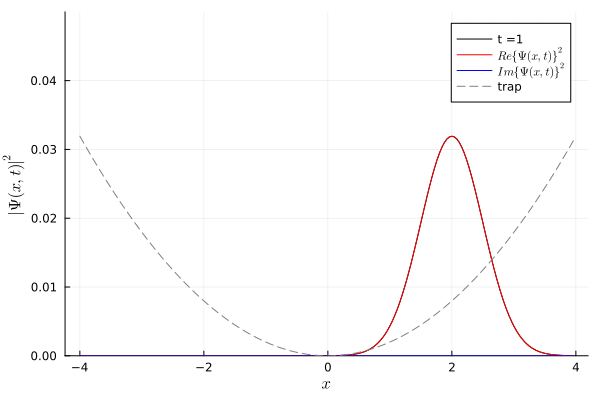

In [8]:
FPS = 10

# Scaled trapping potential for plotting purposes
V1 = (ω^2*x_points.^2*m/2)/maximum(ω^2*x_points.^2*m/2)*maximum(abs2.(psi0.data)) 

pt = @animate for i=1:length(time)
    psi = psi_t[i]
    plot(x_points,abs.(psi.data).^2 , lc=:black, label = "t =$(i)",
        yaxis=("y", (0., 0.05)), legend =:topright);
    plot!(x_points, real.(psi.data).^2, lc=:red, label = L"Re\{ \Psi(x,t) \}^2",
        legend =:topright);
    plot!(x_points, imag.(psi.data).^2, lc=:blue, label = L"Im\{ \Psi(x,t) \}^2",
        legend =:topright);
    plot!(x_points,V1, lc=:gray, linestyle = :dash, xlabel =L"x", ylabel =  L"| \Psi(x,t) |^2", label = "trap", legend =:topright);
end every 10
gif(pt, "KR1_time_evol.gif", fps = FPS)

To show that using the ground state would result to a steady state. We implement the same process using the ground state as the initial state. Note that the ground state or the exact solution for the Hamiltonian in Eq. \eqref{1} is
\begin{equation}
\Psi_0(x) = \frac{\sqrt{m\omega}}{\pi^{1/4}}e^{-\frac{m\omega x^2}{2}}.
\end{equation}

In [9]:
x0::Float64 = 0.0
p0::Float64 = 0.0
sigma = (1/(m*ω))^(1/2)
psi0 = gaussianstate(b_x, x0, p0, sigma);

┌ Info: Saved animation to /Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR1_ground.gif
└ @ Plots /Users/richellejadetuquero/.julia/packages/Plots/nuwp4/src/animation.jl:156


Plots.AnimatedGif("/Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR1_ground.gif")
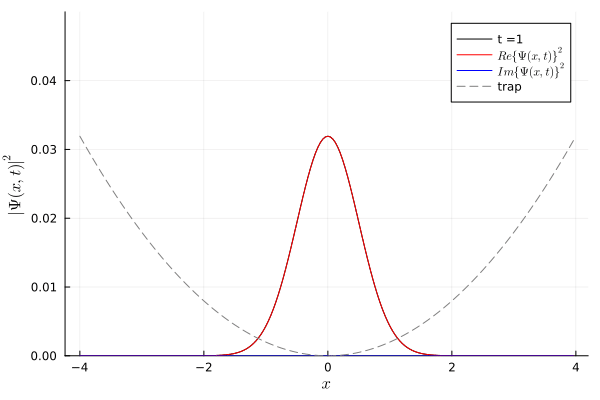

In [10]:
t, psi_t = timeevolution.schroedinger(time, psi0, H);

pt = @animate for i=1:length(time)
    psi = psi_t[i]
    plot(x_points, abs.(psi.data).^2, lc=:black, label = "t =$(i)",
        yaxis=("y", (0., 0.05)), legend =:topright);
    plot!(x_points, real.(psi.data).^2, lc=:red, label = L"Re\{ \Psi(x,t) \}^2",
        legend =:topright);
    plot!(x_points, imag.(psi.data).^2, lc=:blue, label = L"Im\{ \Psi(x,t) \}^2",
        legend =:topright);
    plot!(x_points,V0, lc=:gray, linestyle = :dash, xlabel =L"x", ylabel = L"| \Psi(x,t) |^2" , 
        label = "trap", legend =:topright);
end every 10
gif(pt, "KR1_ground.gif", fps = 10)

As shown in the result, we observe that $\Psi(x,t)$ does not change in time which shows that this is a steady state. This confirms that the simulation is correct since the system is in the ground state.

# KR2: Implement a numerical method/algorithm to solve the quantum system based on the split-step method.

Split operator method is discussed on chapter 16 of [An Introduction to Computer Simulation Methods 3rd ed.](https://www.compadre.org/OSP/document/ServeFile.cfm?ID=7375&DocID=527) [2]. Here we use $\hbar=m=1\Rightarrow h=2\pi$.

The time-dependent Schrodinger equation is given by

\begin{equation}
    i\frac{\partial\Psi(x,t)}{\partial t}=\hat{H}\Psi(x,t)=\left(\hat T+\hat V\right)\Psi(x,t).
\end{equation}

The formal solution to this is
\begin{equation}
    \Psi(x,t)=\hat{U}\Psi(x,t_0),
\end{equation}
where $\hat U$ is the time evolution operator
\begin{equation}
    \hat U=e^{i\hat H(t-t_0)}=e^{i\left(\hat T+\hat V\right)(t-t_0)}.
\end{equation}

So the goal of the algorithm is to create a numerical version of this operator.

For the algorithm, we note the time evolution operator for $\hat T$ and $\hat V$ individually. For $\hat V$, the time evolution in position space is
\begin{equation}
    \Psi(x, t+\Delta t)=e^{-iV(x)\Delta t}\Psi(x, t).
\end{equation}
For $\hat T$, the time evolution in momentum space is
\begin{equation}
    \Psi(p, t+\Delta t)=e^{-ip^2\Delta t/2}\Psi(p, t).
\end{equation}

Then, by De Broglie, 
\begin{equation}
    p=hf=2\pi f.
\end{equation}
This means that we can simply take the Fourier transform $F$ and its inverse $F^{-1}$ of the wavefunction to move back and forth between the position and momentum space. So what we can do is to evolve a half timestep in position, then a full timestep in momentum, and another half timestep in position to get the total time evolution. The time evolution operator is then 
\begin{equation}
    \hat U=e^{-iV(x)\Delta t/2}F^{-1}e^{-ip^2\Delta t/2}Fe^{-iV(x)\Delta t/2}
\end{equation}

In [11]:
x_coeff(V::Vector{ComplexF64}, Δt::Float64) = exp.(-im*V*Δt/2) # Creates the coefficient for position evolution
p_coeff(p::Vector{ComplexF64}, Δt::Float64) = exp.(-im*(p.^2)*Δt/(2)) # Creates the coefficient for momentum evolution

p_coeff (generic function with 1 method)

In [12]:
function SplitStep(ψ, V, p, t_points; potential_evolution=x_coeff, kinetic_evolution=p_coeff)
    #=
    ψ: initial wavefunction
    V: time independent potential
    p: momentum
    T: total time
    Δt: time-step
    =#
    Δt = t_points[2]-t_points[1]
    output = Array{Complex}(undef, length(t_points), length(ψ)) 
    # Creates the empty output array. 1st dimension is time, including initial wvfcn, 2nd is position.
    for (i, t) in enumerate(t_points)
        output[i,:]=ψ[:] # Inputs the current content of ψ into the output
        ψ=fft(potential_evolution(V, Δt).*ψ)
        ψ=ifft(kinetic_evolution(p, Δt).*ψ)
        ψ=potential_evolution(V,Δt).*ψ
    end
    output
end

SplitStep (generic function with 1 method)

First we create the position values vector, using the same parameters as in the previous KR.

In [13]:
x = Vector{ComplexF64}(x_points);

Then, the momentum values, which is created using `fftfreq`, which automatically creates the frequencies for the Fourier transform.

In [14]:
p = 2π.*Vector{ComplexF64}(fftfreq(length(x), length(x)/abs(x[1]-x[end])));

We then create the parameters for the split step, where we use the quantum harmonic oscillator with the initial wavefunction as the ground state solution.

In [15]:
Δx = x[2]-x[1]
p = 2π.*Vector{ComplexF64}(fftfreq(length(x), length(x)/abs(x[1]-x[end])));
x0::Float64 = 2.0 
p0::Float64 = 0.0
ψ = (sqrt(Δx)/(sqrt(sigma)*(π)^(1/4)))*exp.(im*p0*(x.-0.5x0)-((x.-x0).^2)./(2sigma^2))
V = ω^2*x.^2*m/2;
output = SplitStep(ψ,V,p, time);

Animates the real and imaginary components of $\psi$, and its magnitude

In [16]:
x_real = real.(x)
V_real = real.(V)
V1 = (ω^2*x_real.^2*m/2)/maximum(ω^2*x_real.^2*m/2)*maximum(abs2.(output[1,:]))
anim = @animate for i in 1:length(time)
    plot(x_real, V1, label="trap", color=:gray, ls=:dash, xlabel =L"x", ylabel = L"|\Psi(x,t)|^2", ylim=(0,0.05))
    plot!(x_real, real.(output[i,:]).^2, color=:red, label=L"Re\{ \Psi(t) \}^2")
    plot!(x_real, imag.(output[i,:]).^2, color=:blue, label=L"Im\{ \Psi(t) \}^2")
    plot!(x_real, abs2.(output[i,:]), color=:black, label = "t =$(i)")
end every 10
gif(anim, "KR2_anim_qm.gif", fps = FPS)

┌ Info: Saved animation to /Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR2_anim_qm.gif
└ @ Plots /Users/richellejadetuquero/.julia/packages/Plots/nuwp4/src/animation.jl:156


Plots.AnimatedGif("/Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR2_anim_qm.gif")

# KR3: Show the time evolution of the wave function using the two methods

## Creating functions for both the Quantum Optics and Split-step method

Let us create functions to make the comparison and benchmarking of the two methods (Quantum Optics and split-step) efficient. `psi_t_solver` solves using `QuantumOptics.jl` while `split_step_method` solves using a custom split-step method.

In [17]:
function psi_t_solver(m,ω,xmin,xmax, Npoints,x0, p0,sigma, time)
    #Basis
    b_position = PositionBasis(xmin, xmax, Npoints)
    b_momentum = MomentumBasis(b_position)
    # operators
    x = position(b_position)
    p = momentum(b_momentum)
    px = transform(b_momentum, b_position) # position to momentum
    xp = dagger(px)
    
    K = LazyProduct(xp, p^2/2m, px) #kinetic energy
    V = ω^2*x^2*m/2 # potential energy
    H = LazySum(K, V) #Hamiltonian
    
    psi0 = gaussianstate(b_position, x0, p0, sigma) #assume initial state is a gaussian function
    
    t, psi_t = timeevolution.schroedinger(time, psi0, H);
    
    return t,psi_t
end

function SplitStep(ψ, V, p, t_points, m; potential_evolution=x_coeff, kinetic_evolution=p_coeff)
    #=
    ψ: initial wavefunction
    V: time independent potential
    p: momentum
    T: total time
    Δt: time-step
    =#
    Δt = t_points[2]-t_points[1]
    output = Array{Complex}(undef, length(t_points), length(ψ)) 
    # Creates the empty output array. 1st dimension is time, including initial wvfcn, 2nd is position.
    for (i, t) in enumerate(t_points)
        output[i,:]=ψ[:] # Inputs the current content of ψ into the output
        ψ=fft(potential_evolution(V, Δt).*ψ)
        ψ=ifft(kinetic_evolution(p, Δt, m).*ψ)
        ψ=potential_evolution(V,Δt).*ψ
    end
    output
end

x_coeff(V::Vector{ComplexF64}, Δt::Float64) = exp.(-im*V*Δt/2); # Creates the coefficient for position evolution
p_coeff(p::Vector{ComplexF64}, Δt::Float64, mass::Float64=1.) = exp.(-im*(p.^2)*Δt/(2mass)); # Creates the coefficient for momentum evolution

function split_step_method(m,ω,x_min,x_max, Npoints ,x0, p0,sigma, time)
    #=
    ψ: initial wavefunction
    V: time independent potential
    p: momentum
    T: total time
    Δt: time-step
    =#
    x = Vector{ComplexF64}(LinRange(x_min,x_max,Npoints));
    Δx = x[2]-x[1]
    p = 2π.*Vector{ComplexF64}(fftfreq(length(x), length(x)/abs(x[1]-x[end])));
    #p or po 
    ψ = (sqrt(Δx)/(sqrt(sigma)*(π)^(1/4)))*exp.(im*p0*(x.-0.5x0)-((x.-x0).^2)./(2sigma^2))
    V = ω^2*x.^2*m/2;
    output = SplitStep(ψ,V,p,time, m);
    return output
    
end

split_step_method (generic function with 1 method)

Observe that there points in time where two the wavefunctions slightly differ. This is because the split-step method is an approximation (i.e  $\Delta t << 1$).

┌ Info: Saved animation to /Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR3_two_method.gif
└ @ Plots /Users/richellejadetuquero/.julia/packages/Plots/nuwp4/src/animation.jl:156


Plots.AnimatedGif("/Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR3_two_method.gif")
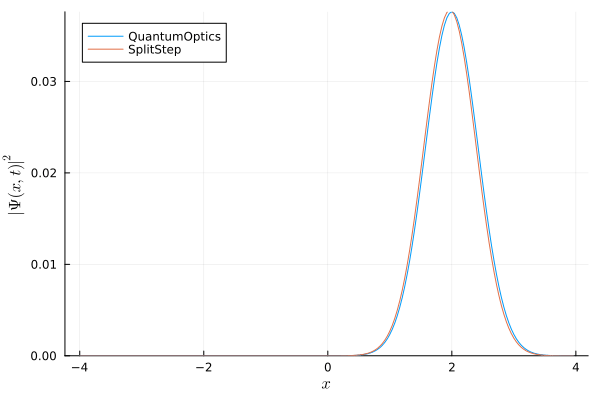

In [18]:
time = [0:0.01:20;];
res = Npoints

t, psi_qop = psi_t_solver(1.0, 2, -4, 4, res, 2, 0,0.6, time);
psi_ssm = split_step_method(1.0, 2, -4, 4, res, 2, 0,0.6, time);
ymax = abs.((sqrt(Δx)/(sqrt(0.6)*(π)^(1/4)))).^2

pt = @animate for i=1:length(time)
    psi = psi_qop[i]
    plot(x_points, abs.(psi.data).^2, ylims=(0,ymax), label="QuantumOptics")
    plot!(x_points, abs.(psi_ssm[i,:]).^2, label="SplitStep", xlabel = L"x", ylabel = L"|\Psi(x, t)|^2")
end every 10
gif(pt, "KR3_two_method.gif", fps=10)

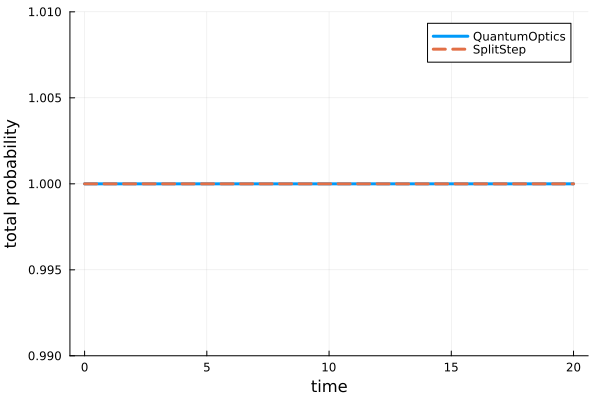

In [19]:
sum_qop = similar(abs.(psi_ssm[:,1]))
sum_ssm = similar(abs.(psi_ssm[:,1]))
for i in eachindex(time)
    psi = psi_qop[i]
    sum_qop[i] = sum(abs2.(psi.data))
    sum_ssm[i] = sum(abs2.(psi_ssm[i,:]))
end
plot(time, sum_qop,linewidth = 3, xlabel="time", ylabel="total probability", ylim = (0.9,1), label="QuantumOptics")
plot!(time, sum_ssm, label="SplitStep", linestyle =:dash, linewidth = 3,ylim = (0.99, 1.01))

We confirm in the above result that the total probability is conserved and therefore shows that the simulations for both methods are working as expected. We note that the total probability must be 1 since there are no atom/s leaking out of the system, and we are dealing with a closed system.

# KR4: Comparison of the two methods to that of the analytical solution.

We can then compare the two methods and check if they produce similar values.

In [20]:
x0::Float64 = 1.75
p0::Float64 = 0.0
psi0 = gaussianstate(b_x, x0, p0, sigma);
t, psi_Qopt = timeevolution.schroedinger(time, psi0, H);
ψ = (sqrt(Δx)/(sqrt(sigma)*(π)^(1/4)))*exp.(im*p0*(x.-0.5x0)-((x.-x0).^2)./(2sigma^2))
psi_SS = SplitStep(ψ,V,p, time);

┌ Info: Saved animation to /Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR4_comparison_evol.gif
└ @ Plots /Users/richellejadetuquero/.julia/packages/Plots/nuwp4/src/animation.jl:156


Plots.AnimatedGif("/Users/richellejadetuquero/Desktop/Physics215_MiniProject/KR4_comparison_evol.gif")
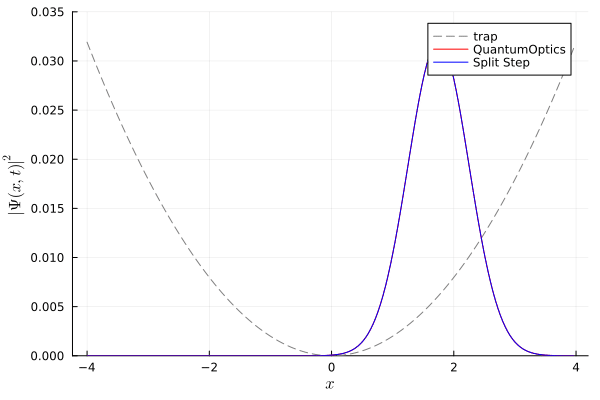

In [21]:
V1 = (ω^2*x_points.^2*m/2)/maximum(ω^2*x_points.^2*m/2)*maximum(abs2.(psi0.data)) # Just for plotting the potential
anim = @animate for i in 1:length(time)
    psi = psi_Qopt[i]
    plot(x_points, V1, label="trap", color=:gray, ls=:dash, xlabel =L"x", ylabel = L"|\Psi(x,t)|^2", ylim=(0,0.035))
    plot!(x_points,abs.(psi.data).^2 , lc=:red, label="QuantumOptics")
    plot!(x_points, abs.(psi_SS[i,:]).^2, color=:blue, label = "Split Step")
end every 10
gif(anim, "KR4_comparison_evol.gif", fps = FPS)

We can see that the two solutions produce similar values, but are slightly off in their frequencies, this can be overtly seen by plotting the values along $x=0$ over time.

In [22]:
Qopt_c = Array{Float64}(undef, length(time))
for i=1:length(time)
    psi = psi_Qopt[i]
    n = abs.(psi.data[Int64((end)//2)+1])
    Qopt_c[i] = n
end

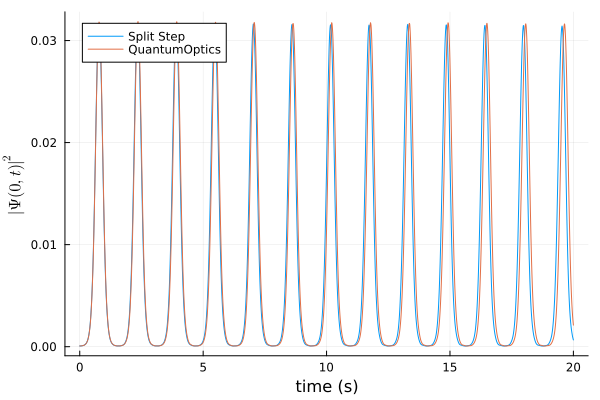

In [23]:
plot(time, abs.(psi_SS[:,Int64((end)//2)+1]).^2, label="Split Step")
plot!(time,Qopt_c.^2, xlabel = "time (s)", ylabel = L"|\Psi(0, t)|^2", label="QuantumOptics")

We can then overtly see that the two solutions have slightly different frequencies. To then see which one is more correct, we can compare then to a known analytic solution, the first order stationary solution to the quantum harmonic oscillator. We know that for the stationary solution, the value at $x=0$ is just a constant, the normalization factor.

In [24]:
x0::Float64 = 0.0
p0::Float64 = 0.0
psi0 = gaussianstate(b_x, x0, p0, sigma);
t, psi_Qopt = timeevolution.schroedinger(time, psi0, H);
ψ = (sqrt(Δx)/(sqrt(sigma)*(π)^(1/4)))*exp.(im*p0*(x.-0.5x0)-((x.-x0).^2)./(2sigma^2))
psi_SS = SplitStep(ψ,V,p, time);

In [25]:
Qopt_c = Array{Float64}(undef, length(time))
for i=1:length(time)
    psi = psi_Qopt[i]
    n = abs.(psi.data[Int64((end)//2+1)])
    Qopt_c[i] = n
end

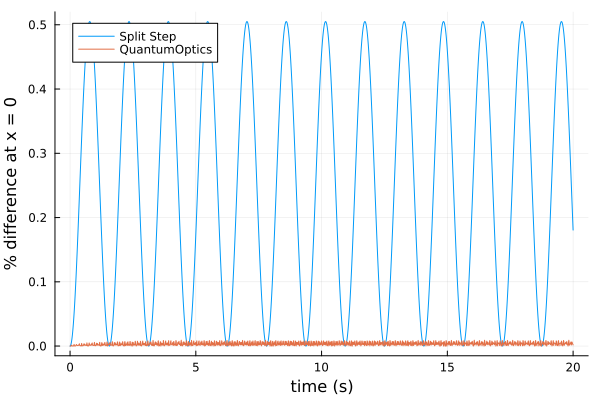

In [26]:
stat_soln = abs.((sqrt(Δx)/(sqrt(sigma)*(π)^(1/4)))).^2
plot(time, 100 .* abs.(stat_soln.-abs.(psi_SS[:,Int64((end)//2)+1]).^2)./stat_soln, label="Split Step")
plot!(time,100 .* abs.(stat_soln.-Qopt_c.^2)./stat_soln, label="QuantumOptics", xlabel = "time (s)",ylabel= "% difference at x = 0")

Since the initial state is the stationary case, we expect that the % difference of the simulation of the two methods must be close to zero. In the figure above, we observe that both method has a % difference of less than 1%. This shows that both method agrees with the theoretical prediction. We also note that between the two methods, the method that uses QuantumOptics has a more accurate result as compared to the Split Step method. This is because the QuantumOptics directly solve the Schroedinger equation using matrices in the form of bra and kets in their respective Hilbert space. Meanwhile, the Split Step method uses approximations and relies on the $\Delta t$ of the simulation. Therefore, we can observe a more accurate result for the Split Step as $\Delta t$ decreases.

# KR5: Compare the two methods using @benchmark.

## Benchmarking Quantum Optics method

Let us calculate for the minimum, median, and maximum execution time of `psi_t_solver`. Note that the macro `@benchmark` runs an expression (in this case the `psi_t_solver`) multiple times where it automatically chooses the right number of evaluations per sample for any given benchmark.

In [27]:
#long execution time

n_val = 100:50:1000 
time_QuantOp_min = zeros(Float64, length(n_val))
time_QuantOp_Q1 = zeros(Float64, length(n_val))
time_QuantOp_median = zeros(Float64, length(n_val))
time_QuantOp_Q3 = zeros(Float64, length(n_val))
time_QuantOp_max = zeros(Float64, length(n_val))
memory_alloc_QuantOp = zeros(Float64, length(n_val))
for (index, npoints) in enumerate(n_val)
    #psi_t_solver(m = 1.0,ω = 2,xmin = -4,xmax= 4, Npoints = npoints,x0 = 2, p0 = 0,sigma=0.6, time = [0:0.1:5;])
    benchmark_result_QuantOp  = @benchmark psi_t_solver(1.0, 2,-4,4, $npoints, 2, 0,0.6, [0:0.1:5;])
    time_QuantOp_min[index] = minimum(benchmark_result_QuantOp.times)
    time_QuantOp_Q1[index] = percentile(benchmark_result_QuantOp.times, 25)
    time_QuantOp_median[index] = median(benchmark_result_QuantOp.times)
    time_QuantOp_Q3[index] = percentile(benchmark_result_QuantOp.times, 75)
    time_QuantOp_max[index] = maximum(benchmark_result_QuantOp.times)
    memory_alloc_QuantOp[index] = benchmark_result_QuantOp.memory
end


## Benchmarking custom split-step algorithm

Let us also calculate for the minimum, median, and maximum execution time of `split_step_method`, also using `@benchmark`.

In [28]:
n_val = 100:50:1000
time_splitstep_min = zeros(Float64, length(n_val))
time_splitstep_Q1 = zeros(Float64, length(n_val))
time_splitstep_median = zeros(Float64, length(n_val))
time_splitstep_Q3 = zeros(Float64, length(n_val))
time_splitstep_max = zeros(Float64, length(n_val))
memory_alloc_splitstep = zeros(Float64, length(n_val))
for (index, npoints) in enumerate(n_val)
    #split_step_method(m = 1.0,ω = 2,xmin = -4,xmax= 4, Npoints = npoints,x0 = 2, p0 = 0,sigma=0.6, time = [0:0.1:5;])
    benchmark_result_splitstep  = @benchmark split_step_method(1.0, 2,-4,4, $npoints, 2, 0,0.6, [0:0.1:5;])
    time_splitstep_min[index] = minimum(benchmark_result_splitstep.times)
    time_splitstep_Q1[index] = percentile(benchmark_result_splitstep.times, 25)
    time_splitstep_median[index] = median(benchmark_result_splitstep.times)
    time_splitstep_Q3[index] = percentile(benchmark_result_splitstep.times, 75)
    time_splitstep_max[index] = maximum(benchmark_result_splitstep.times)
    memory_alloc_splitstep[index] = benchmark_result_splitstep.memory
end


## Execution time

Let us now compare the of the two methods for $Npoints = \{100, 150, 200, 250, 300, \ldots, 900, 950,1000\}$.

The two figures below (second figure presents the y-axis in the logarithmic scale) shows the execution time of the two methods -- using `QuantumOptics.jl` and using a custom split-step method. For both methods, we show the minimum, first quartile, median, third quartile, and maximum execution time. QOP refers to the execution time when we use `QuantumOptics.jl` while SS refers to the split-step method. Observe that there is only one marker for the Quantum Optics method whereas we expected $5$. This is due `@benchmark` choosing the appropriate number of samples to be $1$ for the Quantum Optics method. 

Observe that the maximum execution time of the split-step method seems to be constant function with respect to $N$, while the minimum and median time seems like a logarithmic function. More importantly, comparing the two methods, observe that the Quantum Optics method has a longer execution time for all $N \in \mathrm{Npoints}$.

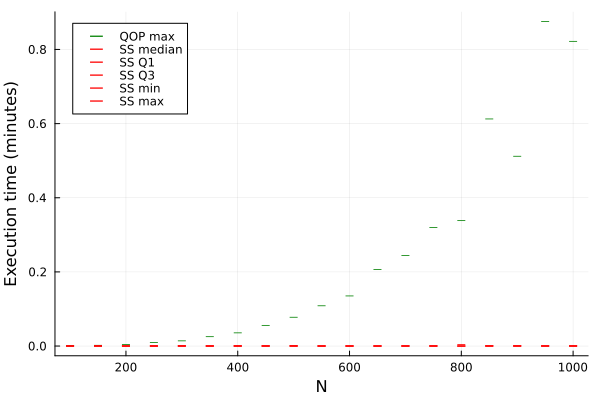

In [29]:
plot(n_val, time_QuantOp_median/(10^(9))/60 ,seriestype=:scatter, label = "QOP median", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_min/(10^(9))/60 ,seriestype=:scatter, label = "QOP min", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_Q1/(10^(9))/60 ,seriestype=:scatter, label = "QOP Q1", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_Q3/(10^(9))/60 ,seriestype=:scatter, label = "QOP Q3", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_max/(10^(9))/60 ,seriestype=:scatter, label = "QOP max", markershape = :hline, markercolor=:green)


plot!(n_val, time_splitstep_median/(10^(9))/60  ,seriestype=:scatter, label = "SS median", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_Q1/(10^(9))/60  ,seriestype=:scatter, label = "SS Q1", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_Q3/(10^(9))/60  ,seriestype=:scatter, label = "SS Q3", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_min/(10^(9))/60  ,seriestype=:scatter, label = "SS min", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_max/(10^(9))/60  ,seriestype=:scatter, label = "SS max", markershape = :hline, markercolor=:red)
# title!("Npoints versus median time")

xlabel!("N")
ylabel!("Execution time (minutes)")
# plot!(yaxis=:log, legend =:topleft)


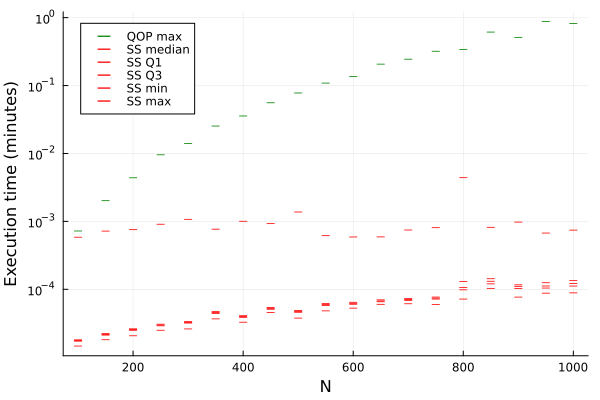

In [30]:
plot(n_val, time_QuantOp_median/(10^(9))/60 ,seriestype=:scatter, label = "QOP median", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_min/(10^(9))/60 ,seriestype=:scatter, label = "QOP min", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_Q1/(10^(9))/60 ,seriestype=:scatter, label = "QOP Q1", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_Q3/(10^(9))/60 ,seriestype=:scatter, label = "QOP Q3", markershape = :hline, markercolor=:green)
plot(n_val, time_QuantOp_max/(10^(9))/60 ,seriestype=:scatter, label = "QOP max", markershape = :hline, markercolor=:green)


plot!(n_val, time_splitstep_median/(10^(9))/60  ,seriestype=:scatter, label = "SS median", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_Q1/(10^(9))/60  ,seriestype=:scatter, label = "SS Q1", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_Q3/(10^(9))/60  ,seriestype=:scatter, label = "SS Q3", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_min/(10^(9))/60  ,seriestype=:scatter, label = "SS min", markershape = :hline, markercolor=:red)
plot!(n_val, time_splitstep_max/(10^(9))/60  ,seriestype=:scatter, label = "SS max", markershape = :hline, markercolor=:red)
# title!("Npoints versus median time")

xlabel!("N")
ylabel!("Execution time (minutes)")
plot!(yaxis=:log, legend =:topleft)


## Total Memory Allocation

Observe that for $N\leq 500$, the split step method require more memory relative to the QuantumOptics method. For $N > 500$, the opposite is observed.

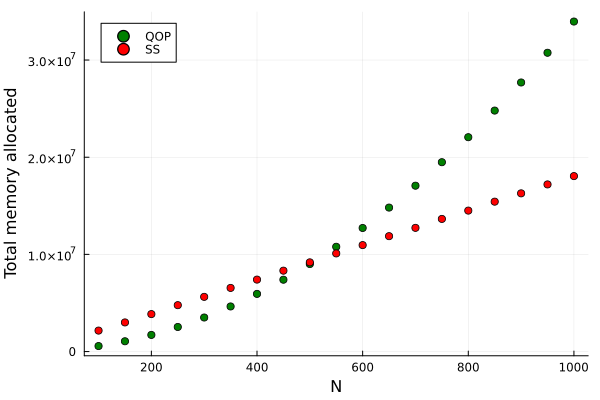

In [31]:
plot(n_val, memory_alloc_QuantOp ,seriestype=:scatter, label = "QOP", markershape = :circle, markercolor=:green)

plot!(n_val, memory_alloc_splitstep ,seriestype=:scatter, label = "SS", markershape = :circle, markercolor=:red)

xlabel!("N")
ylabel!("Total memory allocated")
# plot!(yaxis=:log, legend =:topleft)


# Conclusion
We were able to simulate a one-dimensional system with a harmonic trap using two methods. These are the QuantumOptics method which takes advantage of the julia library to solve quantum systems, and the Split Step method. Both of these methods gave acceptable results and matches that of the analytical prediction. Upon comparison, we note that the QuantumOptics method gave far accurate result than the Split Step method. However, the Split Step method results to faster execution time and lesser memory allocation for $N>500$ points.

## Reference


[1] S. Krämer, D. Plankensteiner, L. Ostermann and H. Ritsch. QuantumOptics. jl: A Julia framework for simulating open quantum systems Comp. Phys. Comm. 227, 109-116 (2018)

[2] H. Gould, J. Tobochnik, W. Christian. An Introduction to Computer Simulation Methods 3rd ed. (2016)